In [1]:
!pip install geostatspy --user
!pip install numba --user
!pip install statsmodels --user

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
import geostatspy.GSLIB as GSLIB                       # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                 # GSLIB methods convert to Python

import os                                               # to set current working directory 
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
%matplotlib inline
import matplotlib.pyplot as plt                         # plotting

# 1 Read facies images from Training dataset

In [12]:
import sys
# Code directory path
new_path = r'/home/users/suihong/1-Unconditional_Upload/'
sys.path.append(new_path)
import dataset
import config

import tensorflow as tf
# Initialize TensorFlow session.
tf.InteractiveSession()

training_set = dataset.load_dataset(data_dir=config.data_dir, verbose=True, **config.dataset)

Streaming data using dataset.TFRecordDataset...
Dataset shape = [1, 64, 64]
Dynamic range = [0, 255]
Label size    = 0


/share/software/user/open/py-tensorflow/1.12.0_py36/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [13]:
fm_no = 1000
allimgs, _ = training_set.get_minibatch_np(fm_no)  # real is the sampled training facies models, which is range 0-255.
allimgs = allimgs/127.5

In [4]:
x_t = np.linspace(0, 63, 64)
y_t = np.linspace(0, 63, 64)
y_co, x_co = np.meshgrid(x_t, y_t)

In [5]:
var_num = 400
point_values = np.zeros((64*64, var_num+2), dtype = np.int32)
point_values[:,0] = x_co.reshape(-1)
point_values[:,1] = y_co.reshape(-1)

tlrange = np.arange(allimgs.shape[0])
np.random.shuffle(tlrange)
random_img_index = tlrange[:var_num]

point_values[:,2:] = np.transpose(allimgs[random_img_index].reshape(var_num, -1), (1, 0))
colu_names = ['X', 'Y'] + [str(e) for e in random_img_index.tolist()]

df_training = pd.DataFrame(data=point_values, columns=colu_names)  

print(df_training.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
df_training.head()                                               # we could also use this command for a table preview
df_training.describe().transpose()                          # summary table of sand only DataFrame statistics

   X  Y  12503  23332  32876  18908  25348  17288  15399  15962  ...  16434  \
0  0  0      1      0      1      0      0      2      0      2  ...      1   
1  0  1      1      0      2      0      0      2      0      2  ...      1   
2  0  2      1      0      2      0      0      2      0      2  ...      1   
3  0  3      1      0      2      0      0      1      0      1  ...      1   
4  0  4      2      0      1      0      0      2      0      1  ...      1   

   3997  21498  18210  19229  5230  13443  5437  25165  5759  
0     2      2      0      0     0      0     0      0     1  
1     1      2      0      0     0      0     0      0     1  
2     1      1      0      0     0      0     1      0     1  
3     0      1      0      0     0      1     1      0     1  
4     0      0      0      0     1      1     1      0     1  

[5 rows x 402 columns]


,count,mean,std,min,25%,50%,75%,max
X,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
Y,4096.0,31.500000,18.475209,0.0,15.75,31.5,47.25,63.0
12503,4096.0,0.874512,0.826529,0.0,0.00,1.0,2.00,2.0
23332,4096.0,0.353516,0.686181,0.0,0.00,0.0,0.00,2.0
32876,4096.0,0.896484,0.816214,0.0,0.00,1.0,2.00,2.0
18908,4096.0,0.334961,0.665279,0.0,0.00,0.0,0.00,2.0
25348,4096.0,0.445312,0.736250,0.0,0.00,0.0,1.00,2.0
17288,4096.0,0.861572,0.834323,0.0,0.00,1.0,2.00,2.0
15399,4096.0,0.990479,0.826400,0.0,0.00,1.0,2.00,2.0
15962,4096.0,0.988281,0.807994,0.0,0.00,1.0,2.00,2.0


### 2 Read facies images generated from Trained GAN

In [6]:
import sys

import pickle
import tensorflow as tf
import PIL.Image

In [7]:
def generate_imgs_from_GAN(code_dir, network_dir):
    sys.path.append(code_dir)
    
    # Initialize TensorFlow session.
    tf.InteractiveSession()
    
    with open(network_dir, 'rb') as file:
        G, D, Gs = pickle.load(file)
   
    # Generate latent vectors.
    latents_plt = np.random.randn(var_num, Gs.input_shapes[0][1]) # 1000 random latents *Gs.input_shapes = [None, 128] [None, 4] [None, 1, 64, 64]
    labels_plt = np.zeros([var_num] + Gs.input_shapes[1][1:]) #np.repeat(labels_plt, 5 * 6, axis=0)
    # Run the generator to produce a set of images.
    images_plt = Gs.run(latents_plt, labels_plt)+1
    
    point_values_GAN = np.zeros((64*64, var_num+2), dtype = np.int32)
    point_values_GAN[:,0] = x_co.reshape(-1)
    point_values_GAN[:,1] = y_co.reshape(-1)
    
    images_plt = np.where(images_plt < 0.7, 0, images_plt)
    images_plt = np.where(images_plt > 1.3, 2, 1)
    point_values_GAN[:,2:] = np.transpose(images_plt.reshape(var_num, -1), (1, 0))
    colu_names_GAN = colu_names = ['X', 'Y'] + [str(e) for e in np.arange(var_num).tolist()] 
    df_GAN = pd.DataFrame(data=point_values_GAN, columns=colu_names_GAN)  

    print(df_GAN.iloc[0:5,:])                                  # display first 4 samples in the table as a preview
    df_GAN.head()                                               # we could also use this command for a table preview
    df_GAN.describe().transpose()                          # summary table of sand only DataFrame statistics
    return df_GAN

In [8]:
ProGAN_code_dir = r'/home/users/suihong/progressive_growing_of_gans_TF_Unconditional_Metric/'
ProGAN_network_dir = '/scratch/users/suihong/ProGAN_MultiChannel_Reusults_ConditionedtoMultiConditions_TF/002-Pro-GAN-Unconditional-related/network-snapshot-008960.pkl'

ProGAN_df = generate_imgs_from_GAN(ProGAN_code_dir, ProGAN_network_dir)

   X  Y  0  1  2  3  4  5  6  7  ...  390  391  392  393  394  395  396  397  \
0  0  0  2  1  1  1  1  1  1  1  ...    2    1    1    2    2    2    1    1   
1  0  1  1  1  1  1  1  1  1  1  ...    2    1    1    1    2    2    1    1   
2  0  2  1  1  1  1  1  2  1  1  ...    1    1    1    1    1    2    1    2   
3  0  3  1  1  1  1  1  2  1  1  ...    1    1    2    1    1    2    1    2   
4  0  4  1  1  1  1  1  2  1  1  ...    2    1    2    1    1    1    1    2   

   398  399  
0    1    1  
1    1    1  
2    1    1  
3    1    1  
4    1    1  

[5 rows x 402 columns]


In [9]:
TraGAN_code_dir = r'/home/users/suihong/progressive_growing_of_gans_TF_TraditionalGAN/'
TraGAN_network_dir = '/scratch/users/suihong/ProGAN_MultiChannel_Reusults_ConditionedtoMultiConditions_TF/001-Traditional-GAN-Unconditional-related/network-snapshot-016000.pkl'

TraGAN_df = generate_imgs_from_GAN(TraGAN_code_dir, TraGAN_network_dir)

/share/software/user/open/py-tensorflow/1.12.0_py36/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


   X  Y  0  1  2  3  4  5  6  7  ...  390  391  392  393  394  395  396  397  \
0  0  0  1  1  1  1  1  1  1  2  ...    1    2    1    1    1    1    1    1   
1  0  1  1  1  1  1  1  1  1  2  ...    1    1    1    1    1    1    1    2   
2  0  2  1  1  1  1  1  1  1  2  ...    1    1    1    1    1    1    1    2   
3  0  3  1  1  1  1  1  1  1  1  ...    1    1    1    1    1    1    1    2   
4  0  4  1  1  1  1  1  1  1  1  ...    1    1    1    1    2    1    1    1   

   398  399  
0    1    1  
1    1    1  
2    1    1  
3    1    1  
4    1    1  

[5 rows x 402 columns]


### 3 Plot Variograms

#### 3.1 Normalize df data 

In [10]:
def norm(df):
    for col in df.columns:
        if col == 'X' or col == "Y": continue
        df[col], tv, tns = geostats.nscore(df, col)
        
    return df

In [11]:
df_training_ns = df_training.copy()
df_training_ns = norm(df_training_ns)
df_training_ns.head()  

,X,Y,12503,23332,32876,18908,25348,17288,15399,15962,...,16434,3997,21498,18210,19229,5230,13443,5437,25165,5759
0,0,0,0.562924,0.730495,0.562924,0.754683,0.530238,3.522738,-0.395954,3.522738,...,0.944389,3.522738,3.522738,0.240036,0.689548,0.381435,-0.165060,0.258975,0.80275,0.992313
1,0,1,0.562924,0.730495,3.522738,0.754683,0.530238,3.522738,-0.395954,3.522738,...,0.944389,0.922628,3.522738,0.240036,0.689548,0.381435,-0.165060,0.258975,0.80275,0.992313
2,0,2,0.562924,0.730495,3.522738,0.754683,0.530238,3.522738,-0.395954,3.522738,...,0.944389,0.922628,1.063945,0.240036,0.689548,0.381435,-0.165060,0.874070,0.80275,0.992313
3,0,3,0.562924,0.730495,3.522738,0.754683,0.530238,0.557912,-0.395954,0.465802,...,0.944389,0.350678,1.063945,0.240036,0.689548,0.381435,0.602083,0.874070,0.80275,0.992313
4,0,4,3.522738,0.730495,0.562924,0.754683,0.530238,3.522738,-0.395954,0.465802,...,0.944389,0.350678,0.533057,0.240036,0.689548,0.967584,0.602083,0.874070,0.80275,0.992313


In [12]:
ProGAN_df_ns = ProGAN_df.copy()
ProGAN_df_ns = norm(ProGAN_df_ns)
ProGAN_df_ns.head()

,X,Y,0,1,2,3,4,5,6,7,...,390,391,392,393,394,395,396,397,398,399
0,0,0,3.522738,0.552914,1.0105,1.307149,1.188544,0.728099,0.772705,1.402089,...,3.522738,0.782641,0.604285,3.522738,3.522738,3.522738,0.677181,0.953027,0.873174,0.630945
1,0,1,0.538001,0.552914,1.0105,1.307149,1.188544,0.728099,0.772705,1.402089,...,3.522738,0.782641,0.604285,0.946303,3.522738,3.522738,0.677181,0.953027,0.873174,0.630945
2,0,2,0.538001,0.552914,1.0105,1.307149,1.188544,3.522738,0.772705,1.402089,...,0.718560,0.782641,0.604285,0.946303,1.111490,3.522738,0.677181,3.522738,0.873174,0.630945
3,0,3,0.538001,0.552914,1.0105,1.307149,1.188544,3.522738,0.772705,1.402089,...,0.718560,0.782641,3.522738,0.946303,1.111490,3.522738,0.677181,3.522738,0.873174,0.630945
4,0,4,0.538001,0.552914,1.0105,1.307149,1.188544,3.522738,0.772705,1.402089,...,3.522738,0.782641,3.522738,0.946303,1.111490,0.843978,0.677181,3.522738,0.873174,0.630945


In [13]:
TraGAN_df_ns = TraGAN_df.copy()
TraGAN_df_ns = norm(TraGAN_df_ns)
TraGAN_df_ns.head()

,X,Y,0,1,2,3,4,5,6,7,...,390,391,392,393,394,395,396,397,398,399
0,0,0,0.728897,0.673338,0.826629,0.866028,1.004401,0.953027,0.500187,3.522738,...,1.351568,3.522738,1.03215,0.991312,0.651238,0.664154,0.989314,0.918888,0.86336,0.60649
1,0,1,0.728897,0.673338,0.826629,0.866028,1.004401,0.953027,0.500187,3.522738,...,1.351568,0.695771,1.03215,0.991312,0.651238,0.664154,0.989314,3.522738,0.86336,0.60649
2,0,2,0.728897,0.673338,0.826629,0.866028,1.004401,0.953027,0.500187,3.522738,...,1.351568,0.695771,1.03215,0.991312,0.651238,0.664154,0.989314,3.522738,0.86336,0.60649
3,0,3,0.728897,0.673338,0.826629,0.866028,1.004401,0.953027,0.500187,0.902214,...,1.351568,0.695771,1.03215,0.991312,0.651238,0.664154,0.989314,3.522738,0.86336,0.60649
4,0,4,0.728897,0.673338,0.826629,0.866028,1.004401,0.953027,0.500187,0.902214,...,1.351568,0.695771,1.03215,0.991312,3.522738,0.664154,0.989314,0.918888,0.86336,0.60649


#### 3.2 Calculate Variogram and plotting

In [27]:
def plot_variogram(df, saveto):
    tmin = -9999.; tmax = 9999.                             # no trimming 
    lag_dist = 3.0; lag_tol = 3.0; nlag = 11;            # maximum lag is 700m and tolerance > 1/2 lag distance for smoothing
    bandh = 3.0; atol = 45                             # no bandwidth, directional variograms
    isill = 1                                               # standardize sill
    azi_mat = [0,45,90,135]           # directions in azimuth to consider
    
    img_num = df.shape[1] - 2
    # Arrays to store the results
    lag = np.zeros((img_num, len(azi_mat),nlag+2)); gamma = np.zeros((img_num, len(azi_mat),nlag+2)); npp = np.zeros((img_num, len(azi_mat),nlag+2));

    for iazi in range(0,len(azi_mat)):         # Loop over all directions
        plt.subplot(2,2,iazi+1)
        plt.plot([0,100],[1.0,1.0],color = 'black')
        plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
        plt.ylabel(r'$\gamma \bf(h)$')
        plt.title('Directional Variogram ' + str(azi_mat[iazi]))
        plt.xlim([0,30])
        plt.ylim([0,1.8])
        #plt.legend(loc='upper left')
        plt.grid(True)
        
        for img in range(img_num):
            lag[img, iazi,:], gamma[img, iazi,:], npp[img, iazi,:] = geostats.gamv(df,"X","Y", df.columns[img + 2],tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
            plt.plot(lag[img, iazi,:-1],gamma[img, iazi,:-1], linestyle='solid',linewidth=0.5,color = 'black')
        
        plt.plot(lag[img, iazi,:-1],np.mean(gamma[:, iazi,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'red')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
   # plt.show()
    plt.savefig(saveto + "Experiment variograms.png", dpi=200) 
    return lag, gamma, npp

In [28]:
#lag_training, gamma_training, npp_training = plot_variogram(df_training.iloc[::4,0:4])  # df_training.iloc[:,0:4]

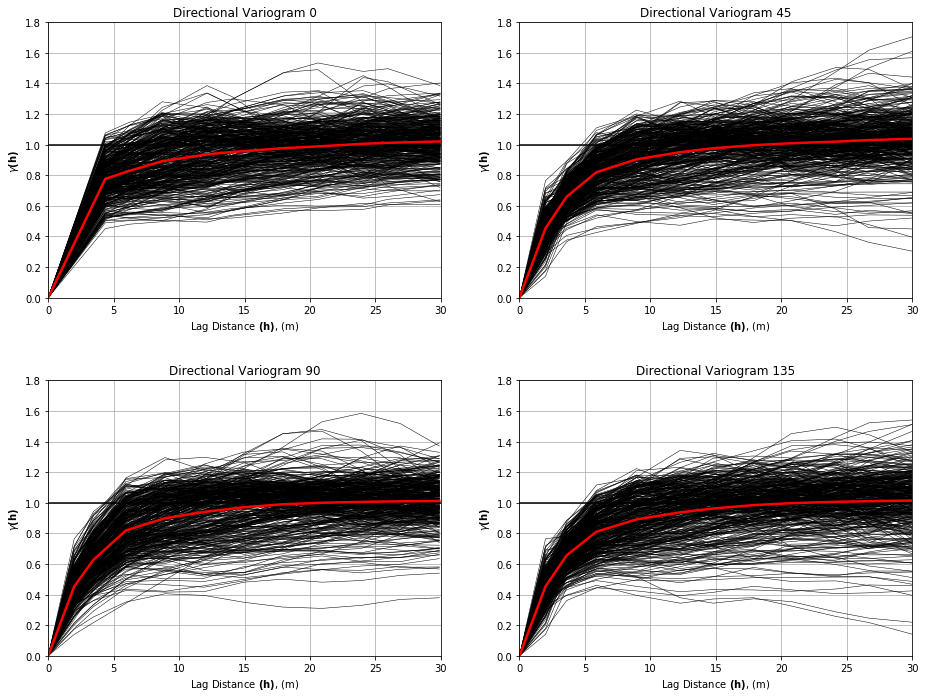

In [29]:
saveto_training= '/scratch/users/suihong/ProGAN_MultiChannel_Reusults_ConditionedtoMultiConditions_TF/001-Traditional-GAN-Unconditional-related/'
lag_training_ns, gamma_training_ns, npp_training_ns = plot_variogram(df_training_ns.iloc[::4,:], saveto_training)

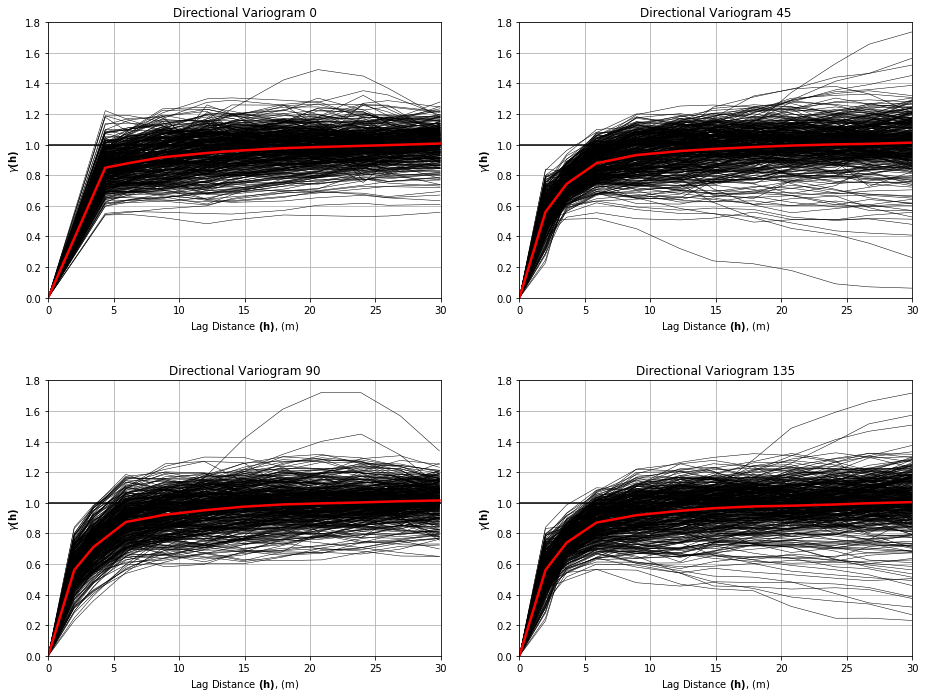

<Figure size 432x288 with 0 Axes>

In [21]:
saveto_ProGAN = '/scratch/users/suihong/ProGAN_MultiChannel_Reusults_ConditionedtoMultiConditions_TF/002-Pro-GAN-Unconditional-related/'
lag_ProGAN_ns, gamma_ProGAN_ns, npp_ProGAN_ns = plot_variogram(ProGAN_df_ns.iloc[::4,:], saveto_ProGAN)


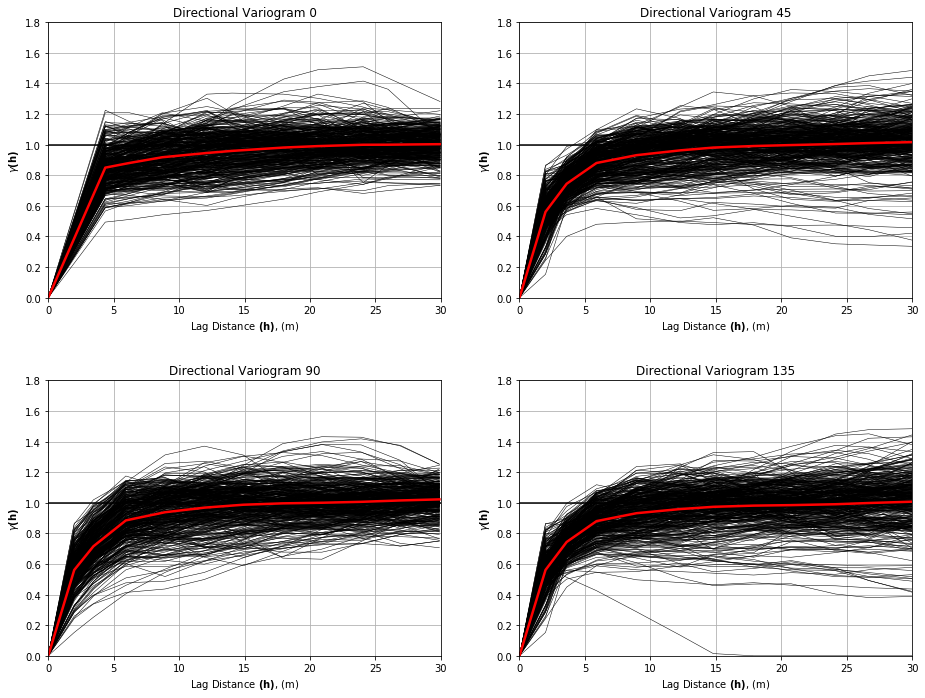

In [18]:
saveto_TraGAN = '/scratch/users/suihong/ProGAN_MultiChannel_Reusults_ConditionedtoMultiConditions_TF/001-Traditional-GAN-Unconditional-related/'
lag_TraGAN_ns, gamma_TraGAN_ns, npp_TraGAN_ns = plot_variogram(TraGAN_df_ns.iloc[::4,:], saveto_TraGAN)

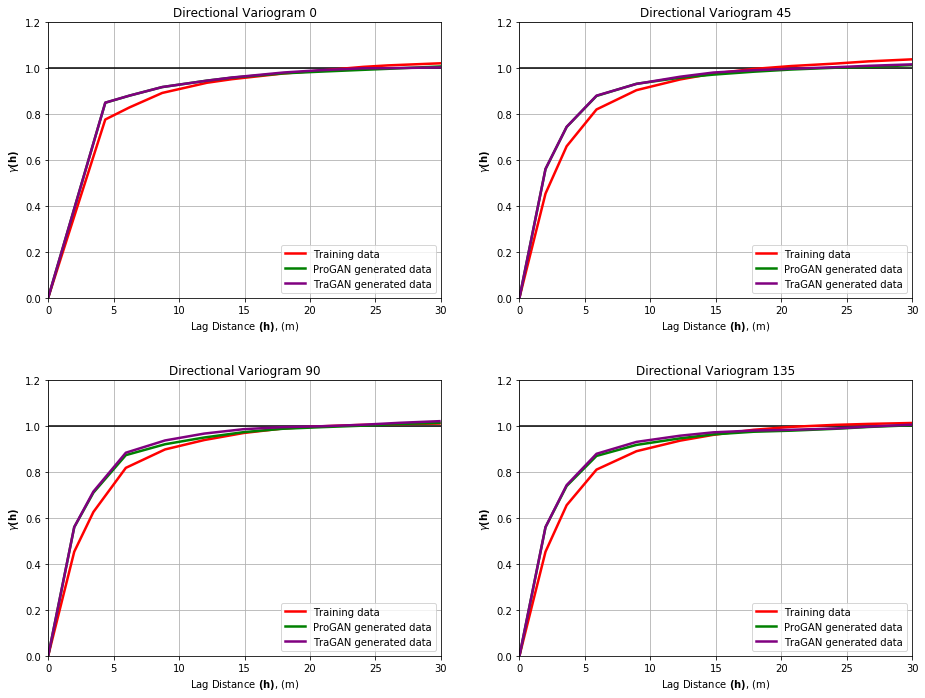

In [19]:
azi_mat = [0,45,90,135] 
for iazi in range(0,len(azi_mat)):         # Loop over all directions
    plt.subplot(2,2,iazi+1)
    plt.plot([0,100],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional Variogram ' + str(azi_mat[iazi]))
    plt.xlim([0,30])
    plt.ylim([0,1.2])
    plt.grid(True)   
    
    plt.plot(lag_training_ns[0, iazi,:-1],np.mean(gamma_training_ns[:, iazi,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'red', label = 'Training data')
    plt.plot(lag_ProGAN_ns[0, iazi,:-1],np.mean(gamma_ProGAN_ns[:, iazi,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'green', label = 'ProGAN generated data')
    plt.plot(lag_TraGAN_ns[0, iazi,:-1],np.mean(gamma_TraGAN_ns[:, iazi,:-1], axis = 0), linestyle='solid',linewidth=2.5,color = 'purple', label = 'TraGAN generated data')
    plt.legend(loc='lower right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
plt.show()  
